<a href="https://colab.research.google.com/github/Sreelakshmi2023/MAINPROJECT-GROUP12/blob/main/cnn%2Btcn%2Blstm_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Use the 'files.upload()' method to upload files
uploaded = files.upload()

# Access the uploaded file
for filename, content in uploaded.items():
    with open(filename, 'wb') as f:
        f.write(content)

Saving phishing.csv to phishing (1).csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Attention, Concatenate, Flatten

In [ ]:
import pandas as pd
# Replace 'your_dataset.csv' with the
df = pd.read_csv('phishing.csv')

In [ ]:
# Import the LabelEncoder module
!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder object
label_encoder = LabelEncoder()

# Apply the fit_transform method to the 'type' column of the df DataFrame
df['type'] = label_encoder.fit_transform(df['type'])
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
max_words = 10000  # Set the maximum number of words in your vocabulary
max_len = 100      # Set the maximum length of the URL sequence

In [ ]:
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['url'])

X_train = tokenizer.texts_to_sequences(train_df['url'])
X_test = tokenizer.texts_to_sequences(test_df['url'])

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
embedding_dim = 50  # Set the embedding dimension
filters = 64        # Set the number of filters in the Conv1D layer
kernel_size = 3     # Set the kernel size in the Conv1D layer
lstm_units = 64     # Set the number of units in the LSTM layer


In [ ]:
input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim)(input_layer)


In [ ]:
conv1d_layer = Conv1D(filters=filters, kernel_size=kernel_size, activation='relu')(embedding_layer)
maxpooling_layer = MaxPooling1D(pool_size=2)(conv1d_layer)

In [ ]:
lstm_layer = LSTM(units=lstm_units, return_sequences=True)(maxpooling_layer)


In [ ]:
attention = Attention()([lstm_layer, lstm_layer])

In [ ]:

concatenated = Concatenate(axis=-1)([lstm_layer, attention])




In [ ]:
flatten_layer = Flatten()(concatenated)
output_layer = Dense(units=4, activation='softmax')(flatten_layer)


In [ ]:
model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
y_train = train_df['type']
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1514/1514 [==============================] - 86s 55ms/step - loss: 0.1897 - accuracy: 0.9346 - val_loss: 0.1179 - val_accuracy: 0.9569
Epoch 2/5
1514/1514 [==============================] - 82s 54ms/step - loss: 0.0858 - accuracy: 0.9685 - val_loss: 0.1173 - val_accuracy: 0.9586
Epoch 3/5
1514/1514 [==============================] - 81s 54ms/step - loss: 0.0701 - accuracy: 0.9729 - val_loss: 0.1192 - val_accuracy: 0.9619
Epoch 4/5
1514/1514 [==============================] - 82s 54ms/step - loss: 0.0643 - accuracy: 0.9744 - val_loss: 0.1264 - val_accuracy: 0.9612
Epoch 5/5
1514/1514 [==============================] - 82s 54ms/step - loss: 0.0616 - accuracy: 0.9759 - val_loss: 0.1223 - val_accuracy: 0.9629


In [ ]:
y_test = test_df['type']
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

421/421 [==============================] - 7s 16ms/step - loss: 0.0991 - accuracy: 0.9645
Test Accuracy: 96.45%


In [ ]:
new_data = ["videosurf.com/pat-patterson-1447461","whttp://style.org.hc360.com/css/detail/mysite/siteconfig/pro_control.css", "http://pastehtml.com/view/blpo63jy9.html"]
sequences = tokenizer.texts_to_sequences(new_data)
padded_sequences = pad_sequences(sequences, maxlen=max_len)
predictions = model.predict(padded_sequences)

1/1 [==============================] - 1s 510ms/step


In [ ]:
predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

print(f'Predicted Labels: {predicted_labels}')

Predicted Labels: [0 2 3]


In [ ]:

label_indices = np.argmax(predictions, axis=1)
print(f'Predicted Labels: {predicted_labels}')
print(f'Label Indices: {label_indices}')

Predicted Labels: [0 2 3]
Label Indices: [0 2 3]


In [ ]:
# Create a dictionary mapping label indices to labels
index_to_label = {0: 'benign', 1: 'defacemnt', 2: 'malware', 3: 'phishing'}

# Map label indices to labels in predictions
predicted_labels_mapped = [index_to_label[index] for index in label_indices]

print(f'Predicted Labels (Mapped): {predicted_labels_mapped}')


Predicted Labels (Mapped): ['benign', 'malware', 'phishing']


In [ ]:
# Step 2: Import pickle module
import pickle

# Step 3: Save the model using pickle.dump()
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
from google.colab import files
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

421/421 [==============================] - 11s 25ms/step
Accuracy: 0.9623
Precision: 0.9601
Recall: 0.9623
F1 Score: 0.9608
ROC AUC: 0.9925


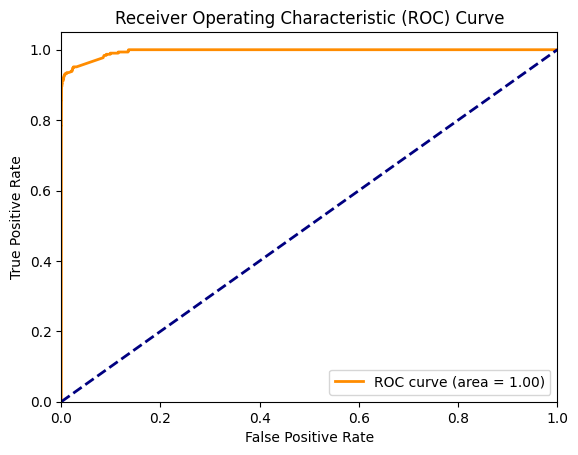

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, average='weighted')
recall = recall_score(y_test, y_pred_labels, average='weighted')
f1 = f1_score(y_test, y_pred_labels, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred, average='macro', multi_class='ovr')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# Plot ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score((y_test == i).astype(int), y_pred[:, i])

plt.figure()
plt.plot(fpr[2], tpr[2], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
